In [116]:
# import necessary packages
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import neuropythy as ny
from itertools import product

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [117]:
v4vo12_file = '../derivatives/surface_areas_2022-02-27.csv'
v4vo12_df = pd.read_csv(v4vo12_file)
v4vo12_df = v4vo12_df.drop(columns=['message'])
v4vo12_df.head(5)

,hV4,VO2,VO1,cortex,rater,sid,hemisphere
0,781.737434,303.489328,100.468879,107230.953125,BrendaQiu,100610,lh
1,653.491056,359.608152,113.126526,108015.562500,BrendaQiu,100610,rh
2,584.953536,333.010054,183.841560,99291.320312,BrendaQiu,102311,lh
3,808.426349,276.758045,427.680084,100608.046875,BrendaQiu,102311,rh
4,961.528820,215.701942,392.237191,91761.718750,BrendaQiu,102816,lh


In [118]:
mean_v4vo12_df = v4vo12_df.query('rater == "mean"')
mean_v4vo12_df = mean_v4vo12_df.rename(columns = {'rater': 'anatomist'})
mean_v4vo12_df

,hV4,VO2,VO1,cortex,anatomist,sid,hemisphere
2172,623.561939,78.579353,143.911909,107230.953125,mean,100610,lh
2173,524.692906,183.422482,152.896416,108015.562500,mean,100610,rh
2174,882.291689,166.049246,229.703877,99291.320312,mean,102311,lh
2175,851.733289,152.341536,341.540606,100608.046875,mean,102311,rh
2176,NaN,NaN,NaN,NaN,mean,102816,lh
...,...,...,...,...,...,...,...
2529,438.137002,372.840134,338.342374,107826.226562,mean,971160,rh
2530,NaN,NaN,NaN,NaN,mean,973770,lh
2531,571.644068,236.984545,303.880580,102054.054688,mean,973770,rh
2532,NaN,NaN,NaN,NaN,mean,995174,lh


In [119]:
v123_df = ny.data['hcp_lines'].surface_area_dataframe

In [120]:
v_area_cols = [f'roi{hemi}{varea}' for hemi, varea in product(['L','R'], ['V1','V2','V3'])]
v123_df = v123_df.query('anatomist == "mean"')
v123_df = v123_df.drop(columns=[col for col in v123_df if col not in ['sid','anatomist']+v_area_cols])
v123_df

,sid,anatomist,roiLV1,roiLV3,roiLV2,roiRV1,roiRV3,roiRV2
4,100610,mean,2182.648869,1119.816370,1728.088569,1860.693153,1172.995850,1659.008599
9,118225,mean,1979.312683,1064.189967,1669.270603,2051.494042,1352.400127,1849.540834
14,140117,mean,1153.694862,872.083832,1118.138452,1116.527387,865.760388,1207.856324
19,158136,mean,1231.193647,1001.229745,1271.163609,1205.712993,1008.570664,1355.516790
24,172130,mean,1022.975665,886.230702,1164.040613,1022.367207,782.037635,1111.529883
...,...,...,...,...,...,...,...,...
884,406836,mean,1444.961363,1114.681135,1335.570071,1273.361188,1045.837380,1290.200584
889,572045,mean,1136.901352,875.898848,1026.256552,974.767644,904.958032,870.247724
894,706040,mean,NaN,NaN,NaN,808.052458,691.081453,773.187416
899,818859,mean,1338.753442,1060.750740,1248.840014,1381.183600,944.633979,1237.964415


In [121]:
roi='V1'
df = v123_df
original_roi_cols = [col for col in v123_df if roi in col]
df = df[original_roi_cols + ['sid','anatomist']]
hemi_cols = [col[3].lower()+'h' for col in value_vars]
df = df.rename(columns=dict(zip(value_vars, var_vars)))
df = pd.melt(df, id_vars=['sid','anatomist'], value_vars=hemi_cols, var_name='hemisphere', value_name=roi)

In [122]:
df

,sid,anatomist,hemisphere,V1
0,100610,mean,lh,2182.648869
1,118225,mean,lh,1979.312683
2,140117,mean,lh,1153.694862
3,158136,mean,lh,1231.193647
4,172130,mean,lh,1022.975665
...,...,...,...,...
357,406836,mean,rh,1273.361188
358,572045,mean,rh,974.767644
359,706040,mean,rh,808.052458
360,818859,mean,rh,1381.183600


In [123]:
def melt_rois_to_lh_rh(df, roi, id_vars=['sid','anatomist']):
    original_roi_cols = [col for col in v123_df if roi in col]
    df = df[original_roi_cols + id_vars]
    hemi_cols = [col[3].lower()+'h' for col in value_vars]
    df = df.rename(columns=dict(zip(original_roi_cols, hemi_cols)))
    df = pd.melt(df, id_vars=id_vars, value_vars=hemi_cols, var_name='hemisphere', value_name=roi, ignore_index=True)
    return df

In [124]:
tmp = {}
for roi in ['V1','V2','V3']:
    tmp[roi] = melt_rois_to_lh_rh(v123_df, roi, id_vars=['sid','anatomist'])

In [125]:
long_v123_df= pd.merge(tmp['V1'],tmp['V2'], on=['sid','anatomist','hemisphere'])
long_v123_df= pd.merge(long_v123_df,tmp['V3'], on=['sid','anatomist','hemisphere'])

In [126]:
long_v123_df

,sid,anatomist,hemisphere,V1,V2,V3
0,100610,mean,lh,2182.648869,1728.088569,1119.816370
1,118225,mean,lh,1979.312683,1669.270603,1064.189967
2,140117,mean,lh,1153.694862,1118.138452,872.083832
3,158136,mean,lh,1231.193647,1271.163609,1001.229745
4,172130,mean,lh,1022.975665,1164.040613,886.230702
...,...,...,...,...,...,...
357,406836,mean,rh,1273.361188,1290.200584,1045.837380
358,572045,mean,rh,974.767644,870.247724,904.958032
359,706040,mean,rh,808.052458,773.187416,691.081453
360,818859,mean,rh,1381.183600,1237.964415,944.633979


In [127]:
# v123_df = pd.DataFrame(
#     {'sid': np.concatenate([v123_df['sid'], v123_df['sid']]),
#      'hemisphere': np.concatenate([['lh']*n, ['rh']*n]),
#      'V1': np.concatenate([v123_df['roiLV1'], v123_df['roiRV1']]),
#      'V2': np.concatenate([v123_df['roiLV2'], v123_df['roiRV2']]),
#      'V3': np.concatenate([v123_df['roiLV3'], v123_df['roiRV3']])}
# )
# v123_df

In [128]:
varea_df = pd.merge(long_v123_df, mean_v4vo12_df, on=['sid','hemisphere','anatomist'])

In [129]:
varea_df

,sid,anatomist,hemisphere,V1,V2,V3,hV4,VO2,VO1,cortex
0,100610,mean,lh,2182.648869,1728.088569,1119.816370,623.561939,78.579353,143.911909,107230.953125
1,118225,mean,lh,1979.312683,1669.270603,1064.189967,806.609505,164.975515,274.716218,111198.218750
2,140117,mean,lh,1153.694862,1118.138452,872.083832,759.415874,115.685624,218.552640,90244.023438
3,158136,mean,lh,1231.193647,1271.163609,1001.229745,NaN,NaN,NaN,NaN
4,172130,mean,lh,1022.975665,1164.040613,886.230702,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
357,406836,mean,rh,1273.361188,1290.200584,1045.837380,418.171651,146.415066,167.455023,90747.507812
358,572045,mean,rh,974.767644,870.247724,904.958032,562.248981,184.154378,271.248286,84353.273438
359,706040,mean,rh,808.052458,773.187416,691.081453,638.636979,150.922837,369.448390,82103.406250
360,818859,mean,rh,1381.183600,1237.964415,944.633979,492.652818,190.031997,301.325443,110419.507812


# Surface area correlation figures

In [130]:
corr_matrix = varea_df.corr()
mask = np.triu(corr_matrix)


/tmp/ipykernel_27676/2587360624.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = varea_df.corr()


<Axes: >

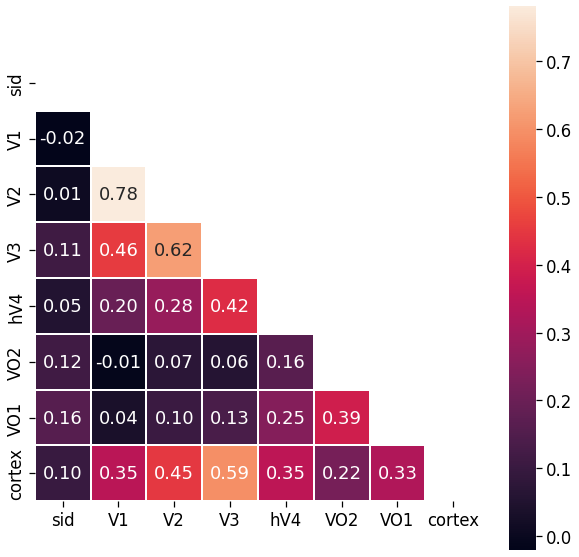

In [131]:
sns.set(style={'axes.facecolor':'white', 'font.family':'Helvetica'}, 
        rc={'figure.figsize': (10,10), 'axes.labelpad': 20}, 
        font_scale=1.5)
sns.heatmap(corr_matrix, mask=mask, 
            annot=True, fmt=".2f", 
            linewidth=.3, square=True)

# Surface comparison figures

In [132]:
def calculate_percent(roi, cortex):
    return roi*100/cortex

In [133]:
long_surface_df = pd.melt(surface_df, id_vars=['rater','sid','hemisphere','cortex'], value_vars=['hV4','VO2','VO1'], var_name='roi', value_name='surface_area')

In [134]:
long_surface_df.head()

,rater,sid,hemisphere,cortex,roi,surface_area
0,BrendaQiu,100610,lh,107230.953125,hV4,781.737434
1,BrendaQiu,100610,rh,108015.562500,hV4,653.491056
2,BrendaQiu,102311,lh,99291.320312,hV4,584.953536
3,BrendaQiu,102311,rh,100608.046875,hV4,808.426349
4,BrendaQiu,102816,lh,91761.718750,hV4,961.528820


In [135]:
long_surface_df['p_surface_area'] = long_surface_df.apply(lambda x: calculate_percent(roi=x.surface_area, cortex=x.cortex), axis=1)

In [136]:
long_surface_df = long_surface_df.dropna()
long_surface_df = long_surface_df.query('rater != "mean"')

In [137]:
long_surface_df.query('sid == 100610 & roi == "hV4"')

,rater,sid,hemisphere,cortex,roi,surface_area,p_surface_area
0,BrendaQiu,100610,lh,107230.953125,hV4,781.737434,0.729022
1,BrendaQiu,100610,rh,108015.562500,hV4,653.491056,0.604997
362,bogengsong,100610,lh,107230.953125,hV4,754.363699,0.703494
363,bogengsong,100610,rh,108015.562500,hV4,654.180812,0.605636
724,JiyeongHa,100610,lh,107230.953125,hV4,811.905871,0.757156
725,JiyeongHa,100610,rh,108015.562500,hV4,755.964210,0.699866
1086,lindazelinzhao,100610,lh,107230.953125,hV4,768.647748,0.716815
1087,lindazelinzhao,100610,rh,108015.562500,hV4,817.357322,0.756703
1448,nourahboujaber,100610,lh,107230.953125,hV4,207.842733,0.193827
1449,nourahboujaber,100610,rh,108015.562500,hV4,477.484318,0.442051


In [138]:
def plot_surface_area(df, hue='hemisphere', percentage=True):
    if percentage is True:
        y = 'p_surface_area'
    else:
        y = 'surface_area' 
    sns.set(style={'axes.facecolor':'white', 'font.family':'Helvetica'}, rc={'figure.figsize':(8,5), 'axes.labelpad': 20}, font_scale=1.5)
    grid = sns.violinplot(data=long_surface_df, x="roi", y=y, 
                          order=['hV4', 'VO1', 'VO2'], 
                          hue='hemisphere', split=(hue!=None), 
                          orient="v", linewidth=2, dodge=True, bw=.15, palette='Reds', height=10)
    grid.set_ylabel(ylabel="Surface Area (%)", labelpad=25)
    grid.set_xlabel(xlabel="", labelpad=25)
    grid.tick_params(bottom=False)
    sns.despine(top=True, bottom=True, right=True)
    lgd = grid.legend(title='Hemisphere', loc='upper left', bbox_to_anchor=(0.99, 1.05))
    lgd.get_frame().set_edgecolor('none')
    return grid


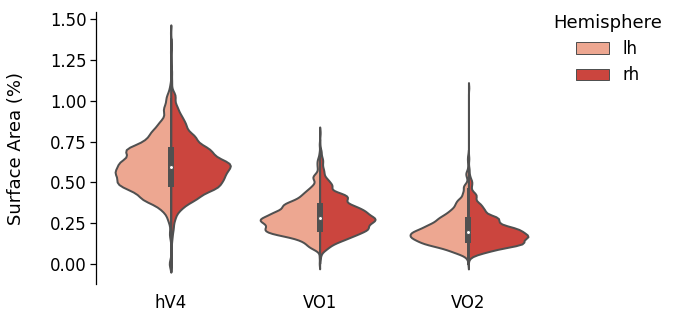

In [139]:
ax = plot_surface_area(long_surface_df);

In [140]:
df = df.explode('p_surface_area')
df['p_surface_area'] = df['p_surface_area'].astype('float')
def plot_surface_area_columns(df, hue='hemisphere', percentage=True):
    df['dummy'] = 0

KeyError: 'p_surface_area'

In [ ]:

grid = sns.catplot(data=df, x='roi', y='p_surface_area', kind='violin', 
                   hue='roi', col="rater", linewidth=2,
                   orient="v", height=5, aspect=1.2, palette="Reds", inner='box',
                   dodge=True, bw=.2, sharey=True)
grid.set_axis_labels('ROIs', 'Relative Area (%)')
# for ax in grid.fig.axes:
#     ax.set_xticklabels('')
#     ax.set_xlabel('')
#     ax.tick_params(bottom=False)
#     for tick in ax.get_xticklabels():
#         tick.set_visible(False)


In [ ]:
ax.get_xlabel()